In [41]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [73]:
from pandas_datareader import DataReader
from datetime import datetime

df = DataReader('ADBE',  'yahoo', datetime(2018,1,1), datetime(2021,4,1))

In [74]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,177.800003,175.259995,175.850006,177.699997,2432800,177.699997
2018-01-03,181.889999,177.699997,178.000000,181.039993,2561200,181.039993
2018-01-04,184.059998,181.639999,181.929993,183.220001,2211400,183.220001
2018-01-05,185.899994,183.539993,185.000000,185.339996,2376500,185.339996
2018-01-08,185.600006,183.830002,184.949997,185.039993,2088000,185.039993
...,...,...,...,...,...,...
2021-03-26,469.769989,449.049988,450.250000,469.089996,3614400,469.089996
2021-03-29,472.000000,462.500000,469.029999,469.320007,3141900,469.320007
2021-03-30,469.089996,461.500000,462.579987,465.459991,2436300,465.459991


In [75]:
df1 = df["Adj Close"]

In [76]:
df1.shape

(818,)

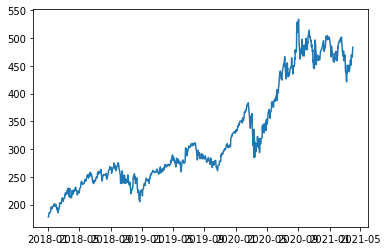

In [77]:
plt.plot(df1)

In [78]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [79]:
print(df1)


[[0.        ]
 [0.00937938]
 [0.01550128]
 [0.02145465]
 [0.02061218]
 [0.0252738 ]
 [0.02642517]
 [0.03150801]
 [0.04872229]
 [0.04144906]
 [0.0527661 ]
 [0.0519517 ]
 [0.05063184]
 [0.05655715]
 [0.0628756 ]
 [0.05638866]
 [0.05563044]
 [0.06627354]
 [0.05765234]
 [0.05391743]
 [0.06194889]
 [0.0608818 ]
 [0.05037912]
 [0.03529909]
 [0.04709353]
 [0.04111205]
 [0.02094919]
 [0.0288964 ]
 [0.04057848]
 [0.04431339]
 [0.05456335]
 [0.07096323]
 [0.06700365]
 [0.07099129]
 [0.068492  ]
 [0.06995227]
 [0.08997475]
 [0.09674248]
 [0.08739121]
 [0.08826175]
 [0.07955631]
 [0.09011513]
 [0.09396239]
 [0.09634934]
 [0.10996912]
 [0.10867733]
 [0.12190397]
 [0.12142658]
 [0.11811289]
 [0.11440608]
 [0.11561359]
 [0.13437239]
 [0.12490872]
 [0.14616682]
 [0.13802306]
 [0.12024715]
 [0.10480205]
 [0.14380794]
 [0.10137604]
 [0.09783768]
 [0.10777873]
 [0.09710756]
 [0.10735747]
 [0.13296829]
 [0.12872788]
 [0.11488347]
 [0.11645606]
 [0.13150801]
 [0.12898065]
 [0.13833196]
 [0.13018815]
 [0.13

In [80]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]